In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!git clone https://github.com/VimalMollyn/ED6001-Term-Project.git

Cloning into 'ED6001-Term-Project'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 54 (delta 14), reused 41 (delta 11), pack-reused 0
Unpacking objects: 100% (54/54), done.


In [16]:
import numpy as np
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook

import sys
sys.path.insert(1, '/content/ED6001-Term-Project/Preprocessing/')
from utils import *

In [17]:
path_to_data = Path("/content/drive/MyDrive/ED6001_MIA_Term_Project/data/IXI-T1")

## Testing adding noise

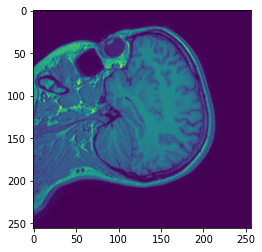

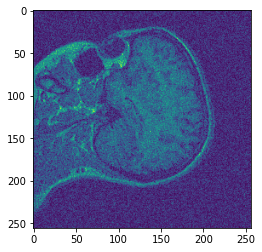

In [18]:
## tests
sample_file = next(path_to_data.iterdir())

nii_img = nib.load(sample_file)
sample_img = nii_img.get_fdata()
plt.imshow(sample_img[:, :, 40])
plt.show()

noisy_sample = add_rice_noise(sample_img)
plt.imshow(noisy_sample[:, :, 40])
plt.show()

In [19]:
from multiprocessing import Pool
NCPU = 8

In [20]:
path_to_datasets = Path("/content/drive/MyDrive/ED6001_MIA_Term_Project/data/")
for path_to_data in path_to_datasets.iterdir():

    if "tiny" in path_to_data.name:
        continue
    print(f" noise to the dataset: {path_to_data.name}")
        
    path_to_save_noisy = Path(f"/content/drive/MyDrive/ED6001_MIA_Term_Project/noisy/{path_to_data.name}")
    path_to_save_noisy.mkdir(parents=True, exist_ok=True)

    ## Generate a bunch of noisy images
    file_path_gen = path_to_data.iterdir
    params = [{
        "file_path": file_path,
        "path_to_save": path_to_save_noisy
    } for file_path in file_path_gen()]
    
    with Pool(processes=NCPU) as p:
        MAX_COUNT = len([*file_path_gen()])
        
        for res in tqdm_notebook(p.imap(add_noise_and_save, params), total=MAX_COUNT):
            pass

Adding noise to the dataset: IXI-PD


  0%|          | 0/578 [00:00<?, ?it/s]

Adding noise to the dataset: ixi_tiny
Adding noise to the dataset: IXI-T2


  0%|          | 0/578 [00:00<?, ?it/s]

Adding noise to the dataset: IXI-T1


  0%|          | 0/581 [00:00<?, ?it/s]

In [22]:
# verify that all the files have been generated
for path_to_folder in path_to_save_noisy.parent.iterdir():
    total = len([*path_to_folder.iterdir()])
    print(path_to_folder.name, total)

IXI-PD 578
IXI-T2 578
IXI-T1 581
